In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to a DataFrame for convenience
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Features (X) and Target (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data['target']     # Target column (species)

# Display the first few rows
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (120, 4)
Testing set shape: (30, 4)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Display results
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")


Logistic Regression: Accuracy = 1.00
Decision Tree: Accuracy = 1.00
Random Forest: Accuracy = 1.00
K-Nearest Neighbors: Accuracy = 1.00
SVM: Accuracy = 1.00


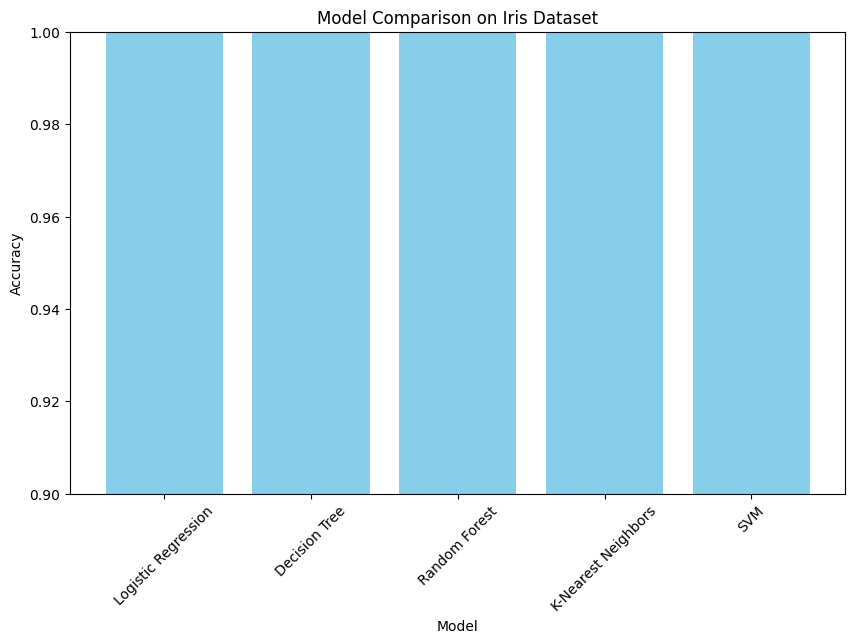

In [6]:
import matplotlib.pyplot as plt

# Bar plot of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Comparison on Iris Dataset")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)  # Adjust the range to highlight differences
plt.show()
